### Project: "Text Classification"

#### Goal: to build a text classification model and predict the artist from a piece of text

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import os
from typing import Tuple, List
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from IPython.display import Image

# Word Cloud
from matplotlib import pyplot as plt
import wordcloud

# Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
# Download package for tokenization:
nltk.download('punkt')

# Download package for stop-words:
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/lena/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/lena/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### 1. Download HTML pages & Get a list of song urls:

In [4]:
num = 20

def collect_song_links(artist:str, site:str='metrolyrics') -> Tuple[List, str]:

    links = []  
    if site == 'metrolyrics':
        artist = artist.replace(' ', '-')
        url = "https://www.metrolyrics.com/" + artist + "-lyrics.html"
        response = requests.get(url)
        if response.status_code != 200:
            print('Sorry try again.')

        soup = BeautifulSoup(markup=response.text)
        for td in soup.find_all('td'):
            if td.a is not None:
                links.append(td.a.get('href'))  
    
    elif site == 'lyrics':
        print('Feature not available.')
    
    return links, artist

### 2. Extract lyrics from song urls:

In [5]:
def get_songs_lyrics(links:list, artist_name:str, num:int) -> List[Tuple]:
    
    lyrics = []
    for li in links[:num]:
        response = requests.get(li)
        soup = BeautifulSoup(markup=response.text)
        lyrics_section = soup.find(attrs={'id':'lyrics-body-text'})
        lyrics_chunk = []
        for verse in lyrics_section.find_all('p', class_='verse'):
            lyrics_chunk.append(verse.text)

        lyrics.append((' '.join(lyrics_chunk))) #artist_name
    
    return lyrics

### 3. Combine two functions together:

In [6]:
def main (artist, num):
    links, artist = collect_song_links(artist)
    results = get_songs_lyrics(links, artist, num)
    return results

### 4. Creating the LABELS and getting the text:

In [7]:
LABELS = ['frank sinatra'] * num + ['chris rea'] * num

In [8]:
CORPUS = main('frank sinatra', num) + main('chris rea', num)
CORPUS

["L is for the way you look at me\nO is for the only one I see\nV is very, very extraordinary\nE is even more than anyone that you adore can Love is all that I can give to you\nLove is more than just a game for two\nTwo in love can make it\nTake my heart and please don't break it\nLove was made for me and you L is for the way you look at me\nO is for the only one I see\nV is very, very extraordinary\nE is even more than anyone that you adore can Love is all that I can give to you\nLove is more than just a game for two\nTwo in love can make it\nTake my heart and please don't break it\nLove was made for me and you\nLove was made for me and you\nLove was made for me and you\nLove was made for me and you",
 "Start spreading the news\nI am leaving today\nI want to be a part of it\nNew York, New York These vagabond shoes\nAre longing to stray\nRight through the very heart of it\nNew York, New York I wanna wake up, in a city\nThat doesn't sleep\nAnd find I'm king of the hill\nTop of the heap 

### 5. Cleaning the text:

In [9]:
def clean_text(text):
    
    stop_words = set(stopwords.words('english'))
    
    # Converts to lower case and splits up the words:
    words = word_tokenize(str(text).lower())
    
    filtered_words = []
    
    for word in words:
    # Removes all the punctuations and stop words:
     if word not in stop_words and word.isalpha(): 
        filtered_words.append(word)
    
    return " ".join(filtered_words)

In [10]:
clean_text(CORPUS[1])

'start spreading news leaving today want part new york new york vagabond shoes longing stray right heart new york new york wan na wake city sleep find king hill top heap little town blues melting away make brand new start old new york make make anywhere new york new york new york new york want wake city never sleeps find hey number one top list king hill hey number one little town blues melted away gon na make brand new start old new york make gon na make anywhere new york new york new york'

In [12]:
cleaning_corpus=[]

for song in CORPUS:
    
    clean_song = clean_text(song)
    cleaning_corpus.append(clean_song)

In [186]:
cleaning_corpus

['l way look one see v extraordinary e even anyone adore love give love game love make take heart please break love made l way look one see v extraordinary e even anyone adore love give love game love make take heart please break love made love made love made love made',
 'start spreading news leaving today want part new york new york vagabond shoes longing stray right heart new york new york wan wake city sleep find king hill top heap little town blues melting away make brand new start old new york make make anywhere new york new york new york new york want wake city never sleeps find hey number one top list king hill hey number one little town blues melted away make brand new start old new york make make anywhere new york new york new york',
 '',
 'end near face final curtain friend say clear state case certain lived life full travelled every highway much way regrets mention saw without exemption planned chartered course careful step along much way yes times sure knew bit could chew 

### 6. Bag Of Words method (Converting text to numbers):

In [187]:
cv = CountVectorizer(stop_words='english', ngram_range=(1, 1))
vec = cv.fit_transform(cleaning_corpus)
pd.DataFrame(vec.todense(), columns=cv.get_feature_names(), index=LABELS)

,acapulco,ache,adore,ahead,air,alive,allow,amor,amusing,angels,...,wrinkles,writer,written,wrong,yeah,years,yes,york,young,younger
frank sinatra,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
frank sinatra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,13,0,0
frank sinatra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
frank sinatra,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,2,0,0,0
frank sinatra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
frank sinatra,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
frank sinatra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
frank sinatra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
frank sinatra,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
frank sinatra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 7. Normalization:

In [188]:
tf = TfidfTransformer()
vec = tf.fit_transform(vec)
pd.DataFrame(vec.todense(), columns=cv.get_feature_names(), index=LABELS)

,acapulco,ache,adore,ahead,air,alive,allow,amor,amusing,angels,...,wrinkles,writer,written,wrong,yeah,years,yes,york,young,younger
frank sinatra,0.000000,0.000000,0.297188,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
frank sinatra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.678841,0.000000,0.000000
frank sinatra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
frank sinatra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.11872,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.196504,0.000000,0.000000,0.000000
frank sinatra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
frank sinatra,0.000000,0.000000,0.000000,0.000000,0.000000,0.126732,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
frank sinatra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
frank sinatra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
frank sinatra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.098434,0.000000,0.000000,0.000000,0.000000,0.000000,0.081463,0.000000,0.000000,0.000000
frank sinatra,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 8. Put everything together in a pipeline:

In [189]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(cleaning_corpus)

#### Multinomial Naive Bayes Classifier:

In [191]:
clf = MultinomialNB()
clf.fit(X, LABELS)
MultinomialNB()

MultinomialNB()

#### Pipeline:

In [192]:
pipeline = make_pipeline(TfidfVectorizer(stop_words = 'english'), 
                         MultinomialNB(alpha=1.0))

pipeline.fit(cleaning_corpus, LABELS)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer(stop_words='english')),
                ('multinomialnb', MultinomialNB())])

In [193]:
pipeline.predict(['come fly with me lets fly lets fly away if you'])
# should be 'Frank Sinatra - Come Fly With Me'

array(['frank sinatra'], dtype='<U13')

In [194]:
pipeline.predict_proba(['come fly with me lets fly lets fly away if you'])

array([[0.41294713, 0.58705287]])

In [195]:
pipeline.predict(['on the hard fast train on the road to gain something gets right'])
# should be 'Chris Rea - Auberge'

array(['chris rea'], dtype='<U13')

In [196]:
pipeline.predict(['well im standing by a river but the water does'])
# should be 'Chris Rea - The Road to Hell'

array(['chris rea'], dtype='<U13')

In [212]:
pipeline.predict_proba(['well im standing by a river but the water does'])

array([[0.64155063, 0.35844937]])

------------

In [ ]:
# Difference 

In [197]:
fe = pipeline.named_steps['tfidfvectorizer']
nb_model = pipeline.named_steps['multinomialnb']

In [198]:
df = pd.DataFrame(np.exp(nb_model.feature_log_prob_), columns=fe.get_feature_names(), index=['frank sinatra', 'chris rea']).T

In [199]:
df.head()

,frank sinatra,chris rea
acapulco,0.001030,0.001165
ache,0.001079,0.001023
adore,0.001030,0.001327
ahead,0.001030,0.001151
air,0.001030,0.001165


In [200]:
df['diff'] = df['frank sinatra'] - df['chris rea']

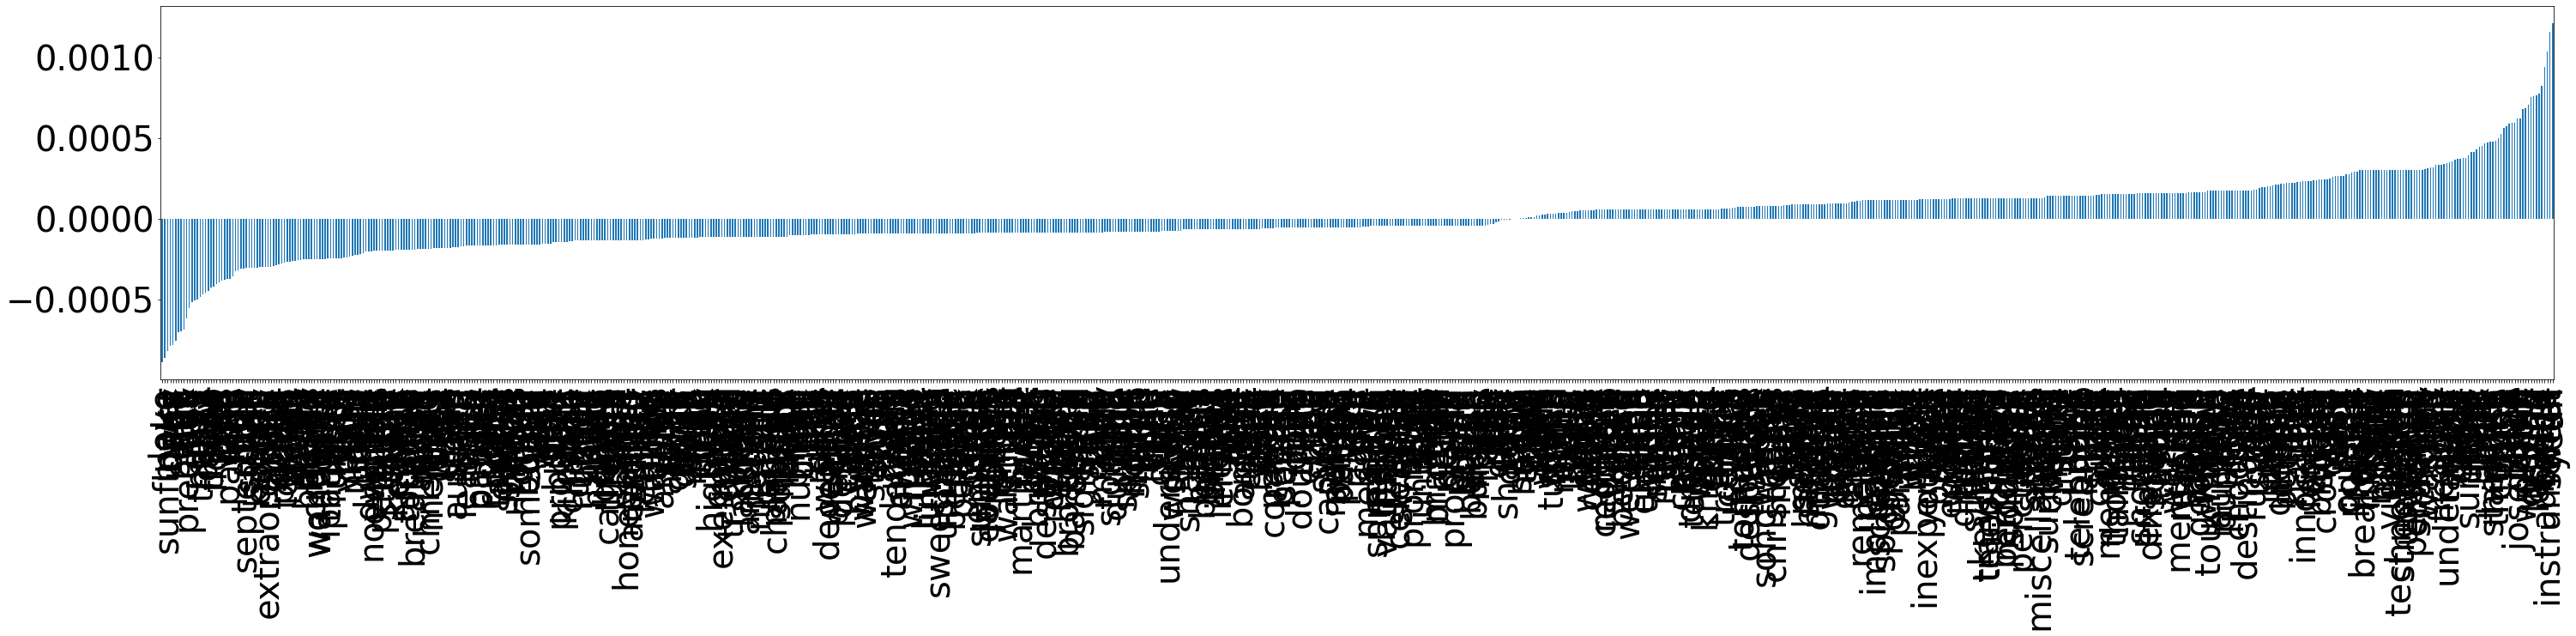

In [211]:
df['diff'].sort_values().plot.bar(figsize=(50, 8), fontsize=40);

### Word Cloud:

In [295]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


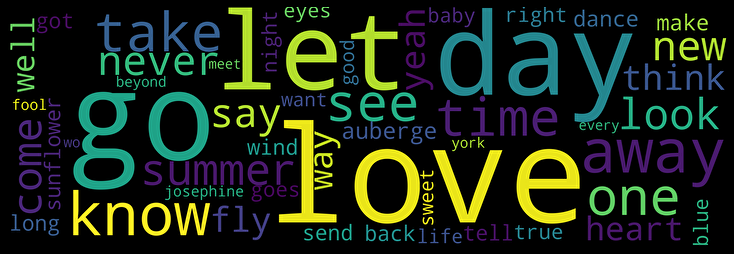

In [302]:
mask = np.zeros((1000, 3000, 11), np.uint8)
mask[150:350,150:350,:] = 255 

text = str(cleaning_corpus)
cloud = wordcloud.WordCloud(background_color = 'black',
                max_words=50,
                width = 3000,
                height = 2000,
                mask=mask,
                collocations=False, 
                contour_color='steelblue').generate(text)
                # stop words are removed!

plt.figure(figsize = (10,10), facecolor = 'k',
    edgecolor = 'k')
plt.axis("off") 
plt.imshow(cloud, interpolation='sinc')
plt.tight_layout(pad = 0) 
plt.savefig('cloud_songs.png')
plt.show()

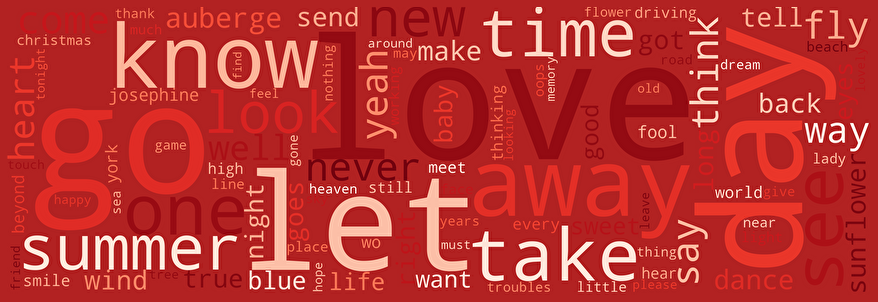

In [368]:
# pip install wordcloud
mask = np.zeros((1000, 3000, 11), np.uint8)
mask[150:350,150:350,:] = 255 

text = str(cleaning_corpus)
cloud = wordcloud.WordCloud(background_color = 'firebrick',
                max_words = 100,
                width = 3000,
                height = 2000,
                mask = mask,
                colormap = 'Reds',
                collocations = False, 
                contour_color = 'steelblue').generate(text)
                # stop words are removed!

plt.figure(figsize = (12,12), facecolor = 'firebrick',
    edgecolor = 'firebrick')
plt.axis("off") 
plt.imshow(cloud, interpolation = 'sinc')
plt.tight_layout(pad = 0) 
plt.savefig('wordcloud_songs.png')
plt.show()